### Show normalized count plots of genes. 
- Lipocalin-2 (LCN2, NGAL)
- Ferroportin (FPN1, SLC40A1)
- Transferrin receptor 1 (TFR1)
- Ferritin (FT-H and FT-L)
- DMT-1 (SLC11A2)
- Inducible nitric oxide synthase (iNOS, Nos2)
- NADPH oxidases (NOX1-5 and DUOX1-2)
- Hepcidin (HAMP)
- IL-1b
- IL-6
- IL-8 (CXCL8)
- IL-10


In [2]:
import numpy as np

In [1]:
#Libraries
import numpy as np
import pandas as pd
#from nxfvars import nxfvars
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [ ]:
path = "/data/projects/2023/Pseudomonas_aeruginosa/deseq2icbi"
resDir = "/data/projects/2023/Pseudomonas_aeruginosa/40_review/"
input_path = f"{path}/"

In [14]:
database_dir = "/data/projects/2023/Pseudomonas_aeruginosa"
data_dir = (
    f"{database_dir}/20_deseq2icbi/07_deseq2_batch_effect_volcano_names"
)
sig_genes_file = (
    f"{data_dir}/hAO_inf_hAO_ctrl_IHWsigGenes.tsv"
)
all_genes_file = (
    f"{data_dir}/hAO_inf_hAO_ctrl_IHWallGenes.tsv"
)
tpm_file  = (
    f"{database_dir}/10_rnaseq_pipeline/star_salmon/salmon.merged.gene_tpm.tsv"
)

counts_file  = (
    f"{database_dir}/10_rnaseq_pipeline/star_salmon/salmon.merged.gene_counts.tsv"
)

log2_cpm_plus_one_file  = (
    f"{database_dir}/10_rnaseq_pipeline/star_salmon/log2_cpm_counts_plus_one.tsv"
)

In [43]:
sig_genes = pd.read_csv(sig_genes_file , sep = "\t")
all_genes = pd.read_csv(all_genes_file , sep = "\t")
tpm = pd.read_csv(tpm_file, sep = "\t")
counts = pd.read_csv(counts_file, sep = "\t")
#log2_cpm = pd.read_csv(log2_cpm_plus_one_file, sep = ",")
#log2_cpm = log2_cpm.iloc[:,1:]

In [39]:
tpm

,gene_id,gene_name,COPD_r1_ctrl,COPD_r1_inf,COPD_r2_ctrl,COPD_r2_inf,COPD_r3_ctrl,COPD_r3_inf,COPD_r4_ctrl,COPD_r4_inf,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
0,ENSG00000000003.15,TSPAN6,398.078052,351.407725,286.506365,251.137118,315.661508,257.828653,379.777669,318.903892,298.293716,272.817572,212.424075,195.604019,254.460689,209.917414,223.285183,189.215207
1,ENSG00000000005.6,TNMD,0.000000,0.000000,0.000000,0.296327,0.071498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067108,0.000000,0.122995,0.064054
2,ENSG00000000419.14,DPM1,15.908197,20.938993,20.126373,23.335927,16.873412,20.287341,16.462496,16.636971,15.722870,22.035852,15.920513,14.261810,14.025477,17.308558,15.066929,13.056384
3,ENSG00000000457.14,SCYL3,39.600557,35.020439,33.219306,26.521265,34.646104,29.359416,37.984894,32.921546,31.813098,24.628983,28.211148,20.779363,32.884405,21.069299,27.550877,27.863872
4,ENSG00000000460.17,C1orf112,1.918576,2.424515,3.177848,3.407760,3.002895,1.661762,3.634577,2.579375,5.510352,4.041177,4.394061,3.116819,2.885625,2.977816,3.197879,2.632932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60703,ENSG00000288721.1,RP5-973N23.5,0.000000,0.454147,0.529641,0.682769,0.293959,0.141068,0.285065,0.065510,0.742746,0.000000,0.727622,0.283347,0.278335,0.188534,0.122995,0.260741
60704,ENSG00000288722.1,F8A1,63.717947,55.246420,64.089493,56.753810,57.723261,54.372288,60.102035,62.905928,64.108284,65.996610,69.172014,70.783397,70.804801,57.259431,67.246805,71.782092
60705,ENSG00000288723.1,RP11-553N16.6,0.080500,0.000000,0.000000,0.000000,0.142995,0.138528,0.000000,0.128969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061498,0.000000
60706,ENSG00000288724.1,RP13-546I2.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
counts

,gene_id,gene_name,COPD_r1_ctrl,COPD_r1_inf,COPD_r2_ctrl,COPD_r2_inf,COPD_r3_ctrl,COPD_r3_inf,COPD_r4_ctrl,COPD_r4_inf,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
0,ENSG00000000003.15,TSPAN6,4979.668,4783.000,3786.609,3390.000,4415.000,3723.691,5329.000,4945.444,4060.000,3578.000,3335.698,2071.000,3791.834,2255.800,3630.791,2954.000
1,ENSG00000000005.6,TNMD,0.000,0.000,0.000,4.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,2.000,1.000
2,ENSG00000000419.14,DPM1,199.000,285.000,266.000,315.002,236.000,293.000,231.000,258.000,214.000,289.000,250.001,151.000,209.000,186.000,245.000,203.835
3,ENSG00000000457.14,SCYL3,495.374,476.662,439.043,358.000,484.578,424.023,533.000,510.535,433.000,323.009,443.000,220.006,490.025,226.413,447.999,435.006
4,ENSG00000000460.17,C1orf112,24.000,33.000,42.000,46.000,42.000,24.000,51.000,40.000,75.000,53.000,69.000,33.000,43.000,32.000,52.000,41.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60703,ENSG00000288721.1,RP5-973N23.5,0.000,6.181,7.000,9.216,4.111,2.037,4.000,1.016,10.109,0.000,11.426,3.000,4.148,2.026,2.000,4.071
60704,ENSG00000288722.1,F8A1,797.065,751.957,847.038,766.097,807.346,785.272,843.345,975.522,872.562,865.545,1086.209,749.435,1055.094,615.317,1093.485,1120.651
60705,ENSG00000288723.1,RP11-553N16.6,1.007,0.000,0.000,0.000,2.000,2.001,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
60706,ENSG00000288724.1,RP13-546I2.2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [50]:
# Separate metadata and numeric columns
metadata = counts[['gene_id', 'gene_name']]
counts_data = counts.drop(['gene_id', 'gene_name'], axis=1)

# Convert all count columns to numeric, handling any non-numeric values as NaN
counts_data = counts_data.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values, if any
counts_data = counts_data.dropna(how='all', axis=1)

# Calculate CPM
counts_sum = counts_data.sum(axis=0)  # Sum of counts for each sample
cpm = counts_data.div(counts_sum, axis=1) * 1e6  # Calculate CPM per sample

# Log2 transform (adding 1 to avoid log(0))
log2_cpm = np.log2(cpm + 1)

# Reattach metadata columns
log2_cpm_final = pd.concat([metadata, log2_cpm], axis=1)

In [61]:
# Define the string to exclude columns
exclude_string = "COPD_"

# Subset the DataFrame excluding columns containing the specific string
subset_counts = counts.filter(regex=f'^(?!.*{exclude_string}).*$')

# Subset the DataFrame excluding columns containing the specific string
subset_tpm = tpm.filter(regex=f'^(?!.*{exclude_string}).*$')

# Subset the DataFrame excluding columns containing the specific string
subset_log2_cpm = log2_cpm_final.filter(regex=f'^(?!.*{exclude_string}).*$')

In [62]:
subset_log2_cpm

,gene_id,gene_name,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
0,ENSG00000000003.15,TSPAN6,8.225418,8.097071,7.737579,7.619149,7.996957,7.720535,7.809191,7.571489
1,ENSG00000000005.6,TNMD,0.000000,0.000000,0.000000,0.000000,0.093706,0.000000,0.167352,0.089571
2,ENSG00000000419.14,DPM1,4.063751,4.525809,4.080707,3.931854,3.909339,4.194446,4.006022,3.813158
3,ENSG00000000457.14,SCYL3,5.036200,4.679705,4.868447,4.444890,5.082548,4.463966,4.835464,4.851191
4,ENSG00000000460.17,C1orf112,2.702736,2.333761,2.431372,2.041530,1.958147,1.991977,2.069661,1.861136
...,...,...,...,...,...,...,...,...,...,...
60703,ENSG00000288721.1,RP5-973N23.5,0.801342,0.000000,0.788795,0.359912,0.354297,0.249182,0.167352,0.334298
60704,ENSG00000288722.1,F8A1,6.024770,6.066016,6.132824,6.165579,6.166008,5.864419,6.092689,6.185511
60705,ENSG00000288723.1,RP11-553N16.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086101,0.000000
60706,ENSG00000288724.1,RP13-546I2.2,0.102284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
list_of_genes_not_found = ["LCN2", "NGAL","FPN1","TFR1","FT-H","FT-L","iNOS","NOX1","NOX5","HAMP"]
list_of_genes_SLC = ["SLC2A6","SLC25A37","SLCO4A1","SLC16A9","SLC7A5","SLC16A1","SLC35F3","SLC5A8","SLC25A25-AS1","SLC6A14","SLCO3A1","SLC45A3","SLC43A2","SLC25A22","SLC11A2","SLC7A11","SLC8B1","SLC30A7","SLC43A3","SLC35E1","SLC38A2"]
list_of_genes_ferritin = ["FTH1"]
list_of_genes_nitric = ["NOS2"]
list_of_genes_oxidases = ["DUOXA2","DUOX2"]
list_of_genes_NADH = ["NDUFAF6","NDUFV2"]
list_of_genes_interleukin = ["IL17C","IL19","IL4I1","IL32","IRAK3","IL1RN","IL4R","IL36G","IRAK2","IL20RA","IRAK1BP1"]
list_of_genes_chemokine = ["CXCL8","CXCL6","CXCL3","CXCL5"]


In [64]:
genes_of_interest = ["LCN2", "NGAL","FPN1","TFR1","FT-H","FT-L","iNOS","NOX1","NOX5","HAMP","SLC2A6","SLC25A37","SLCO4A1","SLC16A9","SLC7A5","SLC16A1","SLC35F3","SLC5A8","SLC25A25-AS1","SLC6A14","SLCO3A1","SLC45A3","SLC43A2","SLC25A22","SLC11A2","SLC7A11","SLC8B1","SLC30A7","SLC43A3","SLC35E1","SLC38A2","FTH1","NOS2","DUOXA2","DUOX2","NDUFAF6","NDUFV2","IL17C","IL19","IL4I1","IL32","IRAK3","IL1RN","IL4R","IL36G","IRAK2","IL20RA","IRAK1BP1","CXCL8","CXCL6","CXCL3","CXCL5"]

In [65]:
# I have modified the list to plot 5 genes in 
list_of_genes = ["CXCL8","CXCL6","CXCL3","CXCL5"]

In [82]:
list_of_genes = ["TRIM29"]

In [83]:
subset_log2_cpm

,gene_id,gene_name,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
0,ENSG00000000003.15,TSPAN6,8.225418,8.097071,7.737579,7.619149,7.996957,7.720535,7.809191,7.571489
1,ENSG00000000005.6,TNMD,0.000000,0.000000,0.000000,0.000000,0.093706,0.000000,0.167352,0.089571
2,ENSG00000000419.14,DPM1,4.063751,4.525809,4.080707,3.931854,3.909339,4.194446,4.006022,3.813158
3,ENSG00000000457.14,SCYL3,5.036200,4.679705,4.868447,4.444890,5.082548,4.463966,4.835464,4.851191
4,ENSG00000000460.17,C1orf112,2.702736,2.333761,2.431372,2.041530,1.958147,1.991977,2.069661,1.861136
...,...,...,...,...,...,...,...,...,...,...
60703,ENSG00000288721.1,RP5-973N23.5,0.801342,0.000000,0.788795,0.359912,0.354297,0.249182,0.167352,0.334298
60704,ENSG00000288722.1,F8A1,6.024770,6.066016,6.132824,6.165579,6.166008,5.864419,6.092689,6.185511
60705,ENSG00000288723.1,RP11-553N16.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086101,0.000000
60706,ENSG00000288724.1,RP13-546I2.2,0.102284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [84]:
subset_df = subset_log2_cpm[subset_log2_cpm['gene_name'].isin(list_of_genes)]

In [85]:
subset_df


,gene_id,gene_name,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
7509,ENSG00000137699.17,TRIM29,7.814328,7.976903,7.427744,7.471113,7.591812,7.590886,7.570653,7.931977


In [86]:
subset_transposed = subset_df.T
new_header = subset_transposed.iloc[1] #grab the first row for the header
#subset_transposed = subset_transposed [1:] #take the data less the header row
subset_transposed .columns = new_header #set the header row as the df header
subset_transposed = subset_transposed.iloc[2:,:]


subset_transposed["sample_conditions"]= subset_transposed.index.str.split("_", n = 2, expand = False)
subset_transposed["sample"] = 0 
subset_transposed["condition"] = 0 
for i in range(len(subset_transposed)):
    subset_transposed["sample"][i]= subset_transposed["sample_conditions"][i][1]
    subset_transposed["condition"][i]= subset_transposed["sample_conditions"][i][2]
    
subset_transposed = subset_transposed.drop("sample_conditions", axis = 1)
subset_transposed = subset_transposed.rename_axis(None, axis=1)
subset_transposed = subset_transposed.reset_index(drop = True)

/tmp/ipykernel_2683484/551501624.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset_transposed["sample"][i]= subset_transposed["sample_conditions"][i][1]
/tmp/ipykernel_2683484/551501624.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single st

In [87]:
subset_transposed

,TRIM29,sample,condition
0,7.814328,r1,ctrl
1,7.976903,r1,inf
2,7.427744,r2,ctrl
3,7.471113,r2,inf
4,7.591812,r3,ctrl
5,7.590886,r3,inf
6,7.570653,r4,ctrl
7,7.931977,r4,inf


### NEED to convert object to float 
Find more elegant solution instead using harcoded names

In [80]:
#Change data type for all numerical columns
for i in range(len(subset_transposed.columns[:-2])):

    subset_transposed[subset_transposed.columns[i]] = subset_transposed[subset_transposed.columns[i]].astype(float)
    



# PLOT

In [89]:
df

,TRIM29,sample,condition
0,7.814328,r1,ctrl
1,7.976903,r1,inf
2,7.427744,r2,ctrl
3,7.471113,r2,inf
4,7.591812,r3,ctrl
5,7.590886,r3,inf
6,7.570653,r4,ctrl
7,7.931977,r4,inf


/tmp/ipykernel_2683484/3916809555.py:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=df_long, x='gene', y='expression', hue='condition',


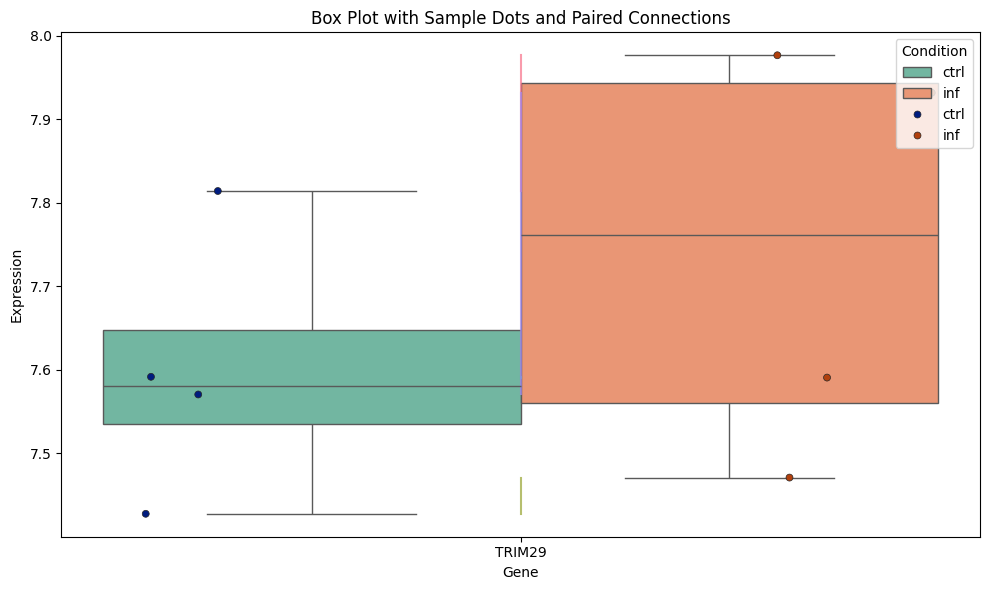

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon

# Sample data

df = pd.DataFrame(subset_transposed)


# Reshape to long format for plotting
df_long = df.melt(id_vars=['sample', 'condition'], var_name='gene', value_name='expression')

# Initialize plot
plt.figure(figsize=(10, 6))

# Boxplot for distribution per gene and condition
sns.boxplot(data=df_long, x='gene', y='expression', hue='condition', palette='Set2', width=0.5)

# Overlay points for each sample
sns.stripplot(data=df_long, x='gene', y='expression', hue='condition', 
              dodge=True, marker='o', edgecolor='gray', linewidth=0.5, palette='dark')

# Draw lines to connect paired samples for each gene
samples = df['sample'].unique()
colors = sns.color_palette("husl", len(samples))  # Unique color for each sample

for i, sample in enumerate(samples):
    subset = df_long[df_long['sample'] == sample]
    for gene in subset['gene'].unique():
        # Get 'ctrl' and 'inf' values for the same sample and gene
        ctrl_value = subset[(subset['gene'] == gene) & (subset['condition'] == 'ctrl')]['expression'].values
        inf_value = subset[(subset['gene'] == gene) & (subset['condition'] == 'inf')]['expression'].values
        if len(ctrl_value) > 0 and len(inf_value) > 0:
            # Plot a line connecting 'ctrl' and 'inf' for the sample within the gene
            plt.plot([gene, gene], [ctrl_value[0], inf_value[0]], color=colors[i], linewidth=1.5, alpha=0.7)

# Final plot adjustments
plt.title("Box Plot with Sample Dots and Paired Connections")
plt.xlabel("Gene")
plt.ylabel("Expression")
plt.legend(title='Condition', loc='upper right')
plt.tight_layout()
plt.show()